# Рекомендация тарифов мобильного оператора

## Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — она уже сделана.
Постройте модель с максимально большим значением **accuracy**. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте **accuracy** на тестовой выборке самостоятельно.


## Инструкция по выполнению проекта

1.	Откройте файл с данными и изучите его. Путь к файлу: `/datasets/users_behavior.csv`. Скачать датасет
2.	Разделите исходные данные на обучающую, валидационную и тестовую выборки.
3.	Исследуйте качество разных моделей, меняя гиперпараметры. Кратко напишите выводы исследования.
4.	Проверьте качество модели на тестовой выборке.
5.	Дополнительное задание: проверьте модели на вменяемость. Ничего страшного, если не получится: эти данные сложнее тех, с которыми вы работали раньше. В следующем курсе подробнее об этом расскажем.


## Описание данных

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

`сalls` — количество звонков,

`minutes` — суммарная длительность звонков в минутах,

`messages` — количество sms-сообщений,

`mb_used` — израсходованный интернет-трафик в Мб,

`is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Первый взгляд на данные

Импорт бибилотек:

In [1]:
import pandas as pd
import seaborn as sns

Загрузим данные:

In [2]:
df = pd.read_csv('users_behavior.csv')

Выведем первые пять строк датафрейма:

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Выведем основную информацию о датафрейме и его статистические харакеристики:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


### Вывод

## Исследовательский анализ данных

<Axes: >

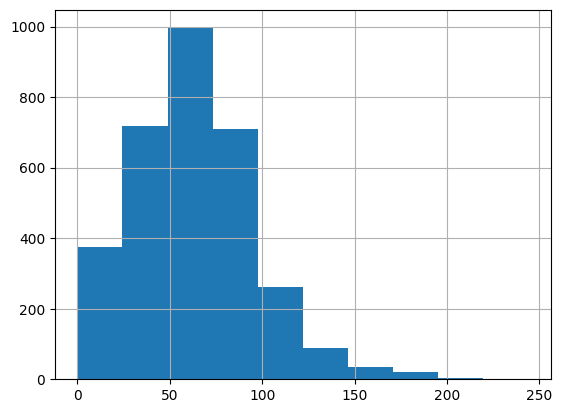

In [6]:
df['calls'].hist()

Интересно посмотреть это в разрезе тарифов:

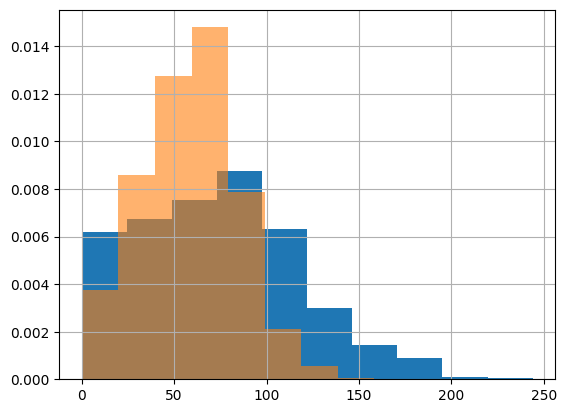

In [7]:
df.query('is_ultra == 1')['calls'].hist(density=True);
df.query('is_ultra == 0')['calls'].hist(alpha=0.6, density=True);

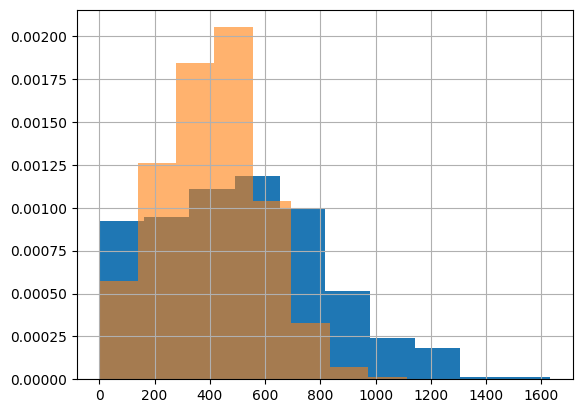

In [8]:
df.query('is_ultra == 1')['minutes'].hist(density=True);
df.query('is_ultra == 0')['minutes'].hist(alpha=0.6, density=True);

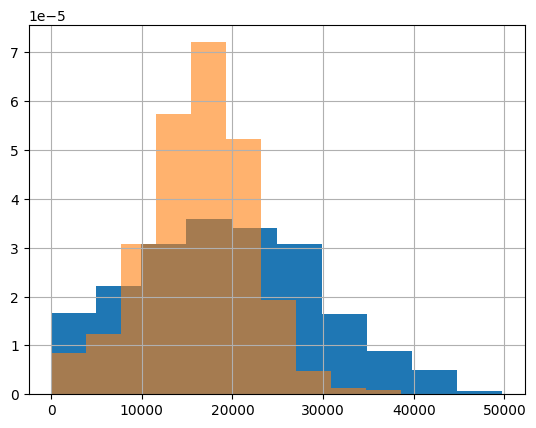

In [9]:
df.query('is_ultra == 1')['mb_used'].hist(density=True);
df.query('is_ultra == 0')['mb_used'].hist(alpha=0.6, density=True);

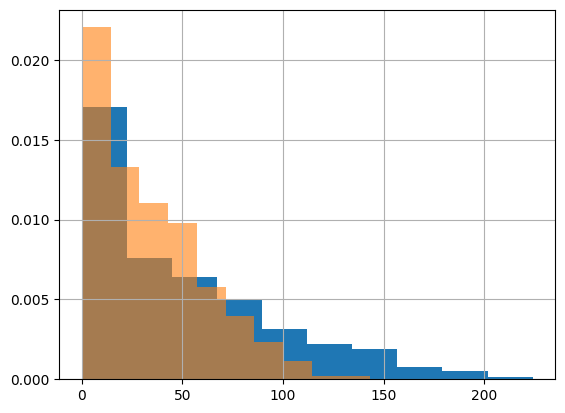

In [10]:
df.query('is_ultra == 1')['messages'].hist(density=True);
df.query('is_ultra == 0')['messages'].hist(alpha=0.6, density=True);

In [11]:
df.query('is_ultra == 1').describe()

,calls,minutes,messages,mb_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


In [12]:
df.query('is_ultra == 0').describe()

,calls,minutes,messages,mb_used,is_ultra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


<Axes: >

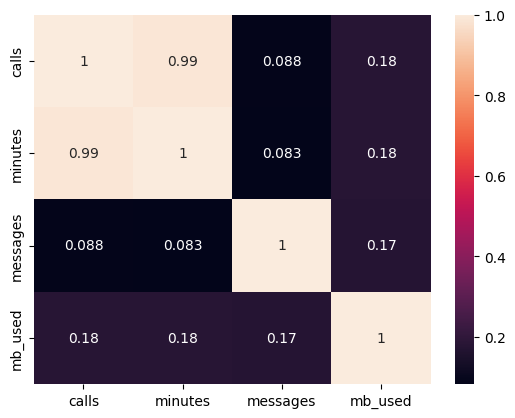

In [13]:
sns.heatmap(df.query('is_ultra == 1').drop('is_ultra', axis=1).corr(), annot=True)

<Axes: >

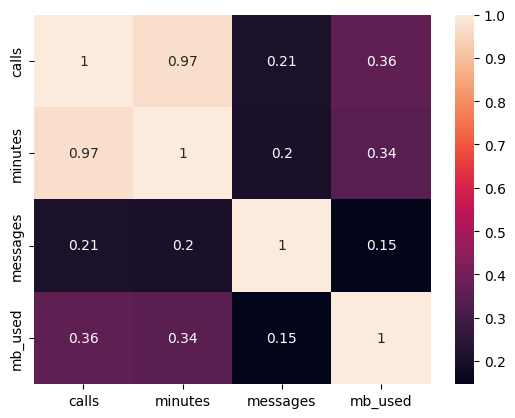

In [14]:
sns.heatmap(df.query('is_ultra == 0').drop('is_ultra', axis=1).corr(), annot=True)

## Моделирование

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
features = df[['calls', 'minutes', 'messages', 'mb_used']]
target = df['is_ultra']

In [17]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=0)

In [18]:
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((2249, 4), (965, 4), (2249,), (965,))

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr_1 = LogisticRegression(random_state=0, penalty='l1', solver='saga')

In [21]:
lr_2 = LogisticRegression(random_state=0, penalty='l2')

In [22]:
lr_1.fit(features_train, target_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', random_state=0, solver='saga')

In [23]:
lr_2.fit(features_train, target_train)

LogisticRegression(random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier(random_state=42)
model.fit(features_train, target_train)

RandomForestClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
model_answers_lr_1 = lr_1.predict(features_test)

In [28]:
accuracy_score(target_test, model_answers_lr_1)

0.6953367875647668

In [29]:
model_answers_lr_2 = lr_2.predict(features_test)

In [30]:
accuracy_score(target_test, model_answers_lr_2)

0.7606217616580311

In [31]:
y_test_pred = model.predict(features_train)
test_accuracy = accuracy_score(target_train, y_test_pred)
print(f'Accuracy на тестовой выборке: {test_accuracy:.4f}')

Accuracy на тестовой выборке: 0.9996


In [32]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
RANDOM_SEED =42

# Assume you have your data loaded into X and y
# X is your feature matrix, and y is your target variable

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# Assuming X_train_resampled and y_train_resampled are obtained through some resampling method

# Initialize Logistic Regression model with L1 penalty and 'saga' solver
LR = LogisticRegression(random_state=RANDOM_SEED, penalty='l1', solver='saga')

# Fit the model on the resampled training data
LR.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
prediction_valid_LR = LR.predict(X_valid)

# Calculate accuracy
accuracy_LR = accuracy_score(prediction_valid_LR, y_valid)

# Standardize the feature matrices using StandardScaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_valid_scaled = scaler.transform(X_valid)

# Now, you can fit the Logistic Regression model on the scaled data
LR.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the scaled validation set
prediction_valid_LR_scaled = LR.predict(X_valid_scaled)

# Calculate accuracy on the scaled data
accuracy_LR_scaled = accuracy_score(prediction_valid_LR_scaled, y_valid)


NameError: name 'X' is not defined